我要分析的是泰坦尼克号数据。对于泰坦尼克号数据，我的问题是：**哪些因素会让船上人的罹难率提高？**关于泰坦尼克号数据的说明请参考文末参考文献。

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读入数据
df = pd.read_csv("titanic-data.csv")

In [3]:
# 清洗整理数据
def get_value_percents(df, attr):
    """计算给定列不同数据所占百分比"""
    counts = df[attr].count()
    value_counts = df[attr].value_counts()
    value_percents = []
    index = value_counts.index
    for i in index:
        value_percents.append(value_counts[i] / float(counts) * 100)
    return pd.Series(value_percents, index=index)

def plot_data_pie(values, labels, title):
    """用饼图可视化数据"""
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    
def clean_age(df):
    """将年龄数据转换为年龄阶段形式"""
    ndf = df.copy()
    for i in range(ndf['PassengerId'].count()):
        if ndf.loc[i, 'Age'] < 16:
            ndf.loc[i, 'Age'] = 'Children'
        elif 16 <= ndf.loc[i, 'Age'] < 35:
            ndf.loc[i, 'Age'] = 'Youth'
        elif 35 <= ndf.loc[i, 'Age'] < 55:
            ndf.loc[i, 'Age'] = 'Middle-Aged'
        elif 55 <= ndf.loc[i, 'Age']:
            ndf.loc[i, 'Age'] = 'Old'
        else:
            ndf.loc[i, 'Age'] = 'Unknown'
    return ndf

def clean_relation(df, attr):
    """将兄弟姐妹和配偶以及父母子女数量数据进行清洗，大于0的数据改为1表示有亲属"""
    ndf = df.copy()
    for i in range(ndf[attr].count()):
        if ndf.loc[i, attr] > 0:
            ndf.loc[i, attr] = 1
    return ndf

# 获取清洗后的数据
clean_age_df = clean_age(df)
clean_sibsp_df = clean_relation(df, 'SibSp')
clean_parch_df = clean_relation(df, 'Parch')

原始数据中的年龄列标识了每一个乘客的年龄，有的乘客年龄未知，则数据为空；其次是同时登船的兄弟姐妹与配偶数量，其中无兄弟姐妹与配偶同时登船的乘客较多；最后是同时登船的父母子女数量，其中无父母子女同时登船的乘客较多。为分析年龄段、是否有兄弟姐妹和配偶同时登船、是否有父母子女同时登船对于遇难比率的影响，将年龄、同时登船的兄弟姐妹与配偶数、同时登船的父母子女数这三列数据进行了更改。这三列数据的详细情况请参见文末参考文献。

由于年龄跨度大，不同年龄数据太多，不便于分析年龄与罹难比率的关系，于是将年龄划分为5段，小于16岁的为儿童，16岁至35岁的为青年，35岁至55岁的为中年，大于等于55岁的为老年，其余为未知年龄段。这样就可以去分析不同年龄段乘客的罹难比率。

另外，拥有同时登船的兄弟姐妹和配偶和拥有同时登船的父母子女的乘客相对较少，若根据拥有数量进行分析乘客罹难比率，存在数据量太少，不易看出数据中的信息以及分析结果可靠性低的问题，因此不论拥有数量，将所有拥有同时登船的兄弟姐妹和配偶的乘客以及所有拥有同时登船的父母子女的乘客的此列数据都设置为1，表示他拥有同时登船的兄弟姐妹及配偶和拥有同时登船的父母子女。

为避免对原始数据修改造成不可预期的问题，因此对原始数据进行复制后对数据进行修改，修改后分别保存为clean_age_df, clean_sibsp_df, clean_parch_df。


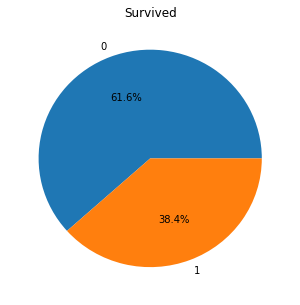

In [4]:
# 探索数据：船上人的罹难情况
survived_value_percents = get_value_percents(df, 'Survived')
plot_data_pie(survived_value_percents, survived_value_percents.index, 'Survived')

由上图可以看出，有61.6%的乘客遇难，38.4%的乘客幸存。

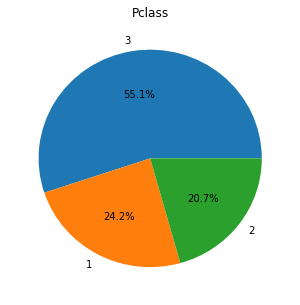

In [5]:
# 探索数据：船上人的船票等级情况
pclass_value_percents = get_value_percents(df, 'Pclass')
plot_data_pie(pclass_value_percents, pclass_value_percents.index, 'Pclass')

由上图可以看出，头等舱票有24.2%，中等舱票有20.7%，低等舱票有55.1%。

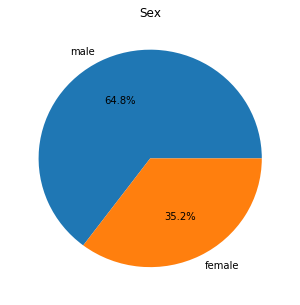

In [6]:
# 探索数据：船上人的性别情况
sex_value_percents = get_value_percents(df, 'Sex')
plot_data_pie(sex_value_percents, sex_value_percents.index, 'Sex')

由上图可知，64.8%的乘客是男性，35.2%的乘客是女性。

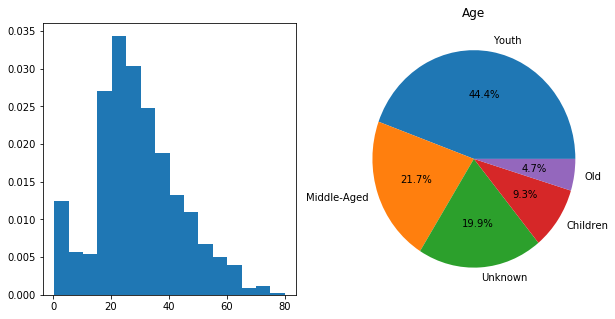

In [7]:
# 探索数据：船上人的年龄情况
def plot_hist_pie(df, hist_attr, hist_bins, pie_data):
    """绘制直方图与饼图"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(df[hist_attr].dropna(),hist_bins, normed=1)
    ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
    plt.title(hist_attr)
    plt.show()

clean_age_percents = get_value_percents(clean_age_df, 'Age')
plot_hist_pie(df, 'Age', 16, clean_age_percents)

由上图可以看出船上有19.9%的人不知道年龄，年轻人有44.4%，中年人有21.7%，孩子有9.3%， 老年人有4.7%。

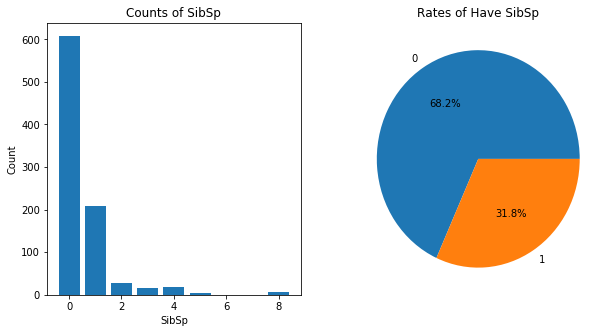

In [23]:
# 探索数据：船上人的兄弟姐妹/配偶情况
def plot_bar_pie(value_counts, pie_data, ylabel, xlabel, bar_title, pie_title):
    """绘制柱状图与饼图"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.bar(value_counts.index, value_counts)
    ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
    ax1.set_title(bar_title)
    ax2.set_title(pie_title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    plt.show()
clean_sibsp_percents = get_value_percents(clean_sibsp_df, 'SibSp')
sibsp_value_counts = df['SibSp'].value_counts()
plot_bar_pie(sibsp_value_counts, clean_sibsp_percents, 'Count', 'SibSp', 'Counts of SibSp', 'Rates of Have SibSp')


由上图可以看出没有兄弟姐妹与配偶同时乘船的乘客占总人数的68.2%，有兄弟姐妹与配偶同时乘船的乘客占总人数的31.8%。

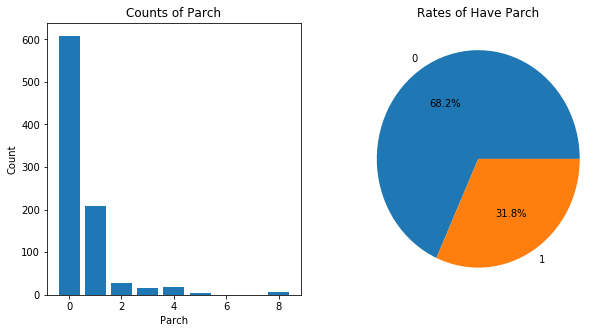

In [24]:
# 探索数据：船上人的父母子女情况
clean_parch_percents = get_value_percents(clean_parch_df, 'Parch')
parch_value_counts = df['Parch'].value_counts()
plot_bar_pie(sibsp_value_counts, clean_sibsp_percents, 'Count', 'Parch', 'Counts of Parch', 'Rates of Have Parch')

由上图可知，没有父母子女同时乘船的乘客占总人数的76.1%，有父母子女同时登船的乘客占总人数的23.9%。

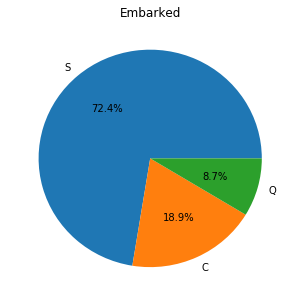

In [10]:
# 探索数据：船上人的出发港口情况
embarked_value_percents = get_value_percents(df, 'Embarked')
plot_data_pie(embarked_value_percents, embarked_value_percents.index, 'Embarked')

由上图可知，从Southampton上船的人最多占72.4%，其次是Cherbourg，占18.9%,从Queenstown登船的人最少，只有8.7%。

由上面的探索可以发现，数据中存在较大偏置，为减小偏置对不同因素和罹难率关系的影响，我将数据按照不同因素进行分组，再计算再该分组下，不同值所对应的乘客的罹难比率和幸存比率，比如：将乘客按照船票等级分组后，分别计算出等级为1、2、3的乘客的罹难率与幸存率。

另外，为更好体现出不同情况下罹难比率的大小关系，绘制了堆叠柱状图。为了解不同情况下罹难情况占整体的比率，绘制了多张饼图。

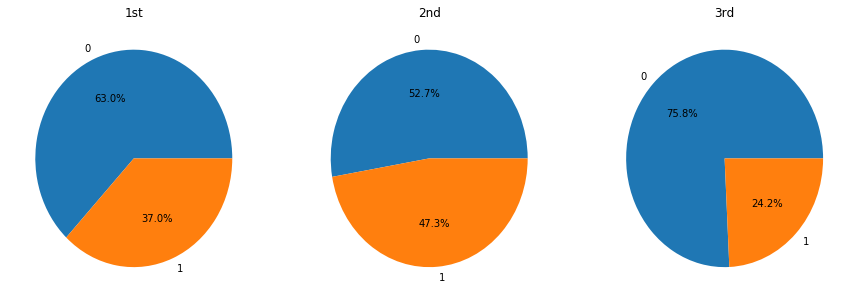

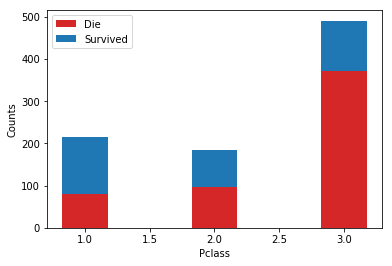

In [45]:
# 探索数据：船票等级与罹难率的关系
def get_group_survived_percents(df, attr):
    # 计算给定分组下的乘客遇难比率与幸存比率
    group_counts = df.groupby(attr)['Survived'].value_counts()
    group_sum = df.groupby(attr)['Survived'].count()
    percents = group_counts / group_sum * 100
    return percents

def plot_pies(rows, cols, percents, labels=None):
    # 绘制指定数量的饼图
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5))
    for i, idx in enumerate(percents.index.levels[0]):
        axes[i].pie(percents[idx], labels=percents.index.levels[1], autopct='%1.1f%%')
        if labels:
            axes[i].set_title(labels[idx])
        else:
            axes[i].set_title(idx)
    plt.show()
    
labels = {1:'1st', 2:'2nd', 3:'3rd'}
pclass_group_survived_percents = get_group_survived_percents(df, 'Pclass')
plot_pies(1, 3, pclass_group_survived_percents, labels)

def plot_bar_stack(value_counts, attr):
    """绘制不同分组下死亡与幸存者数的堆状柱形图"""
    p1 = plt.bar(value_counts.index.levels[0], value_counts[:, 0], 0.35, color='#d62728')
    p2 = plt.bar(value_counts.index.levels[0], value_counts[:, 1], 0.35, bottom=value_counts[:, 0])
    plt.legend((p1[0], p2[0]), ('Die', 'Survived'))
    plt.xlabel(attr)
    plt.ylabel("Counts")
    plt.show()
    
pclass_group_value_counts = df.groupby('Pclass')['Survived'].value_counts()
plot_bar_stack(pclass_group_value_counts, 'Pclass')

由上图可知低等舱乘客中罹难的乘客比重最大，其次是头等舱，最后是中等舱位。

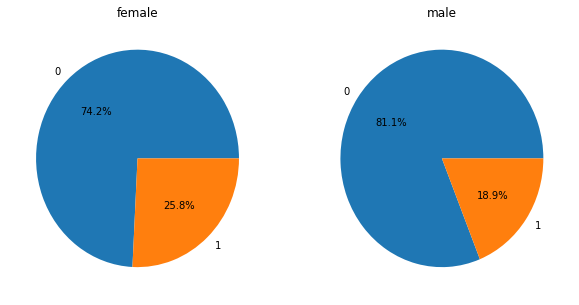

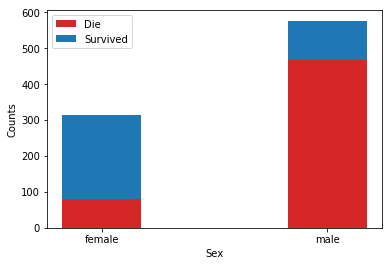

In [46]:
# 探索数据：性别与罹难率的关系
sex_group_survived_percents = get_group_survived_percents(df, 'Sex')
plot_pies(1, 2, sex_group_survived_percents)

sex_group_value_counts = df.groupby('Sex')['Survived'].value_counts()
plot_bar_stack(sex_group_value_counts, 'Sex')

由上图可知，男性乘客的罹难比率较女性乘客的罹难比率高。

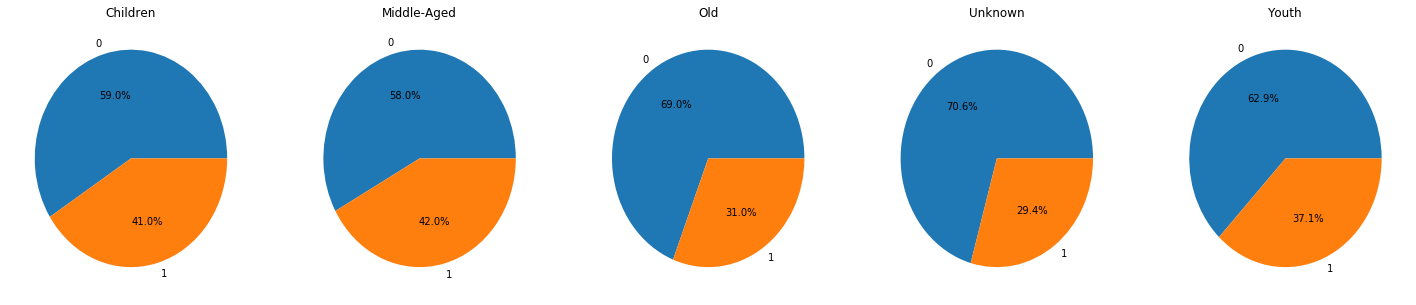

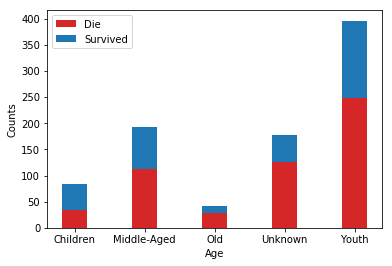

In [48]:
# 探索数据：年龄与罹难率的关系
age_group_survived_percents = get_group_survived_percents(clean_age_df, 'Age')
plot_pies(1, 5, age_group_survived_percents)

age_group_value_counts = clean_age_df.groupby('Age')['Survived'].value_counts()
plot_bar_stack(age_group_value_counts, 'Age')

由图可知，除未知年龄乘客外，老年人和年轻人的罹难比率相对较高，老年人的罹难比率尤其高。

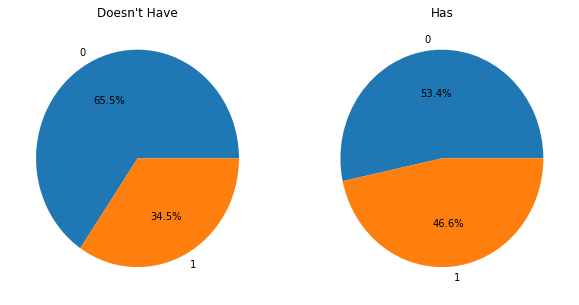

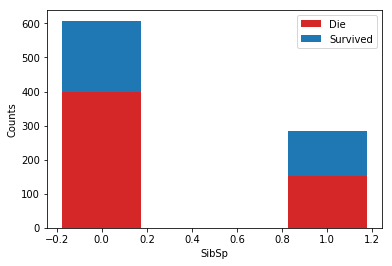

In [50]:
# 探索数据：兄弟姐妹和配偶情况与罹难率的关系
labels = {0: "Doesn't Have", 1: "Has"}
sibsp_group_survived_percents = get_group_survived_percents(clean_sibsp_df, 'SibSp')
plot_pies(1, 2, sibsp_group_survived_percents, labels)

sibsp_group_value_counts = clean_sibsp_df.groupby('SibSp')['Survived'].value_counts()
plot_bar_stack(sibsp_group_value_counts, 'SibSp')

由图可知，没有兄弟姐妹与配偶登船的乘客罹难比率相比有兄弟姐妹与配偶登船的乘客要高。

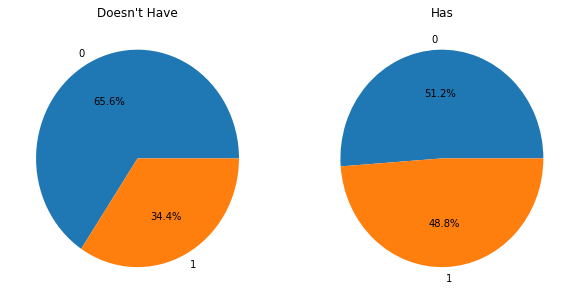

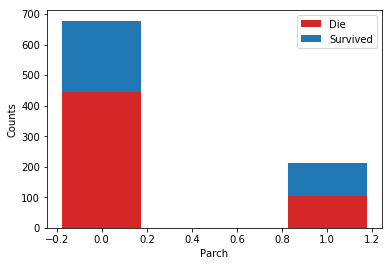

In [51]:
# 探索数据：父母子女情况与罹难率的关系
labels = {0: "Doesn't Have", 1: "Has"}
parch_group_survived_percents = get_group_survived_percents(clean_parch_df, 'Parch')
plot_pies(1, 2, parch_group_survived_percents, labels)

parch_group_value_counts = clean_parch_df.groupby('Parch')['Survived'].value_counts()
plot_bar_stack(parch_group_value_counts, 'Parch')

由图可知，没有父母子女登船的乘客罹难比率较有父母子女登船的乘客要高。

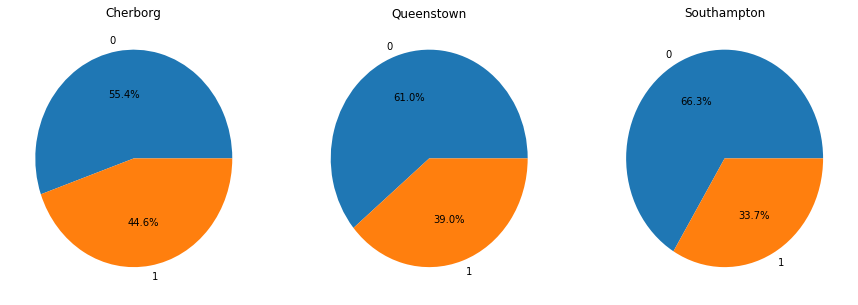

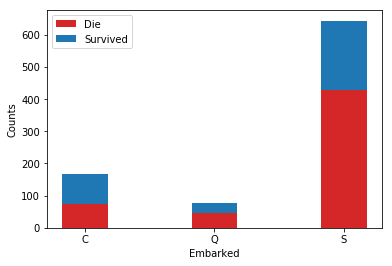

In [52]:
# 探索数据：出发港口与罹难率的关系
labels = {'C': 'Cherborg', 'Q': 'Queenstown', 'S':'Southampton'}
embarked_group_survived_percents = get_group_survived_percents(df, 'Embarked')
plot_pies(1, 3, embarked_group_survived_percents, labels)

embarked_group_value_counts = df.groupby('Embarked')['Survived'].value_counts()
plot_bar_stack(embarked_group_value_counts, 'Embarked')

由上图可知从Southampton登船的乘客罹难比率相较其他港口登船的乘客罹难比率更高。

# 结论

由以上分析，可以初步推断老年乘客与青年乘客更可能遇难，没有父母子女同时登船的乘客更可能遇难，没有兄弟姐妹与配偶同时登船的乘客更可能遇难，男性更可能遇难，低等舱与头等舱乘客更可能遇难，从Southampton港口登船的乘客更可能遇难。但是这些都只是与乘客是否遇难相关而不是因果关系。比如，老年乘客遇难率高的原因可能是因为老年人大多行动不便，但是如果有行动便捷的老年人，他很可能生还。

另外，由于这里使用的数据并不是所有的泰坦尼克号乘客数据，还有大约当前数据集一半大小的数据并未纳入分析范围。基于此原因，当前的分析结果可能存在偏差，因为在剩余的数据集中，可能存在和当前数据集截然相反的情况。

最后，影响乘客最后是否能够存活的因素还有很多，比如：船的使用年限，船长的经验，天气情况等，而这些数据并未包含在当前数据集中。

# 参考文献

- [泰坦尼克号](https://baike.baidu.com/item/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7/5677)
- [泰坦尼克号数据说明](https://www.kaggle.com/c/titanic/data)
- [pandas文档](http://pandas.pydata.org/pandas-docs/stable/)
- [matplotlib文档](https://matplotlib.org/api/pyplot_api.html)